In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

### 1 DFA's Strategy


***1. Investment philosophy.***

   (a) In 100 words or less, describe DFA's belief about how to find premium in the market.
   
   (b) To what degree does their strategy rely on individual equity analysis? Macroeconomic fundamentals? Efficient markets?
   
   (c) What do DFA and others mean by a "value" stock? And a "growth" stock?
   
<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) DFA essentially trades according to the Fama-French 3-factor model, which attributes longterm premium to investments with market beta, small-stock beta, and value-beta. DFA
believes that in addition to being long these factor exposures, they can get an edge through
tax-efficient, and transaction-cost efficient investing. They are a large investment firm
seeking excess returns through a largely passive process.</span>

<span style="color:#00008B"> (b) DFA is not making directional bets based on equity fundamentals, nor on macroeconomic analysis. Rather, DFA is largely relying on their LFM that says size-beta and value-beta
are associated with premium in the long run. Along with this, DFA relies on optimized
execution, market-making, and tax considerations. Thus, their strategy does not rely on
markets already being efficient, but rather seeks to make them more efficient with respect
to small stocks and value stocks in particular.</span>
    
<span style="color:#00008B"> (c) DFA measures "value" and "growth" by looking at a firm's book-to-market ratio of equity values. Those with a high ratio are considered "value" stocks, given that they show a lot
of accounting value, (via book equity,) relative to the market price, (market equity.) While
earnings-price ratios or dividend-price ratios may similarly be referred to as "value" stocks,
forming the ratio with book-equity value leads to fewer data problems, as many firms have
zero dividends or negative earnings. (While firms may have negative book equity, it is less
common.)</span>


***2. Challenges for DFA's view.***

   (a) What challenge did DFA's model see in the 1980's?
   
   (b) And in the 1990's?
   
<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) In the 1980's, DFA saw small stocks under-perform expectations. DFA had to assess whether this was a temporary trend or significant evidence against the model's implication
that size (small-cap) beta should earn a premium.</span>

<span style="color:#00008B"> (b) In the 1990's, DFA saw value stocks greatly under-perform growth stocks, partially driven by the incredible returns of tech stocks. This finally started turning around in 2000 and
2001 when value stocks greatly outperformed growth stocks, especially with the crash of
the so-called tech bubble.</span>
   
***3. The market.***

   (a) Exhibit 3 has data regarding a universe of 5,020 firms. How many are considered "large
cap"? What percent of the market value do they account for?

   (b) Exhibit 6 shows that the U.S. value factor (HML) has underperformed the broader U.S.
equity market in 1926-2001, including every subsample except 1963-1981. So why should
an investor be interested in this value factor?

<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) Large cap stocks are fewer than $5\%$ of the total stock universe, yet they account for over $70\%$ of the market cap.</span>

<span style="color:#00008B"> (b) Though DFA would like high returns, they are less concerned with beating the overall market index than beating their small-cap and value indexes. Given that small cap and
value stocks are imperfectly correlated with the overall market, these holdings will reduce
risk at the margin for any investor completely invested in funds tracking the broader equity
index. Thus, DFA's proposition to investors is that their funds can diversify a portfolio
while adding edge relative to other small-cap and value-stock investments, through their
efficient trading and deeper understanding of these factors.</span>

### 2 The Factors

In [2]:
df = pd.read_excel('../data/dfa_analysis_data.xlsx', sheet_name = 1)
df = df.set_index('Date')
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07-31,0.0296,-0.0238,-0.0273,0.0022
1926-08-31,0.0264,-0.0147,0.0414,0.0025
1926-09-30,0.0036,-0.0139,0.0012,0.0023
1926-10-31,-0.0324,-0.0013,0.0065,0.0032
1926-11-30,0.0253,-0.0016,-0.0038,0.0031
...,...,...,...,...
2021-04-30,0.0493,-0.0311,-0.0093,0.0000
2021-05-31,0.0029,-0.0028,0.0704,0.0000
2021-06-30,0.0279,0.0180,-0.0776,0.0000


In [3]:
factors = df.drop('RF',axis = 1)

1. The Factors. Calculate their univariate performance statistics:

In [4]:
# 1
def summary_stats(df, annual_fac):
    ss_df = (df.mean() * annual_fac).to_frame('Mean')
    ss_df['Vol'] = df.std() * np.sqrt(annual_fac)
    ss_df['Sharpe'] = ss_df['Mean'] / ss_df['Vol']
    ss_df['VaR'] = df.quantile(0.05)
    return ss_df.T

In [5]:
print("Subsample period: Beginning - 1980")
summary_stats(factors[:"1980"],12)

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML
Mean,0.0811,0.0340,0.0491
Vol,0.2051,0.1146,0.1338
Sharpe,0.3957,0.2965,0.3672
VaR,-0.0840,-0.0434,-0.0429


In [6]:
print("Subsample period: 1981 - 2001")
summary_stats(factors["1981":"2001"],12)

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML
Mean,0.0773,-0.0005,0.0636
Vol,0.1574,0.1185,0.1112
Sharpe,0.4909,-0.0046,0.5713
VaR,-0.0645,-0.0465,-0.0418


In [7]:
print("Subsample period: 2002 - End")
summary_stats(factors["2002":],12)

Subsample period: 2002 - End


,Mkt-RF,SMB,HML
Mean,0.0947,0.0238,-0.0117
Vol,0.1509,0.0855,0.0975
Sharpe,0.6279,0.2786,-0.1201
VaR,-0.0772,-0.0374,-0.0400


2. Based on the factor statistics above, answer the following.

(a) Does each factor have a premium (positive expected excess return) in each subsample?

<span style="color:#00008B">**Solution:**</span> No. During the subsample period 1981-2001, the size factor had a negative expected excess return. Also, from 2002 to the end of the data period, the value factor had a negative expected excess return. 

(b) Does the premium to the size factor get smaller after 1980?

<span style="color:#00008B">**Solution:**</span> The premium to the size factor even went to negative from 1981 to 2001, but it has gone back to positive since 2002. 

(c) Does the premium to the value factor get smaller during the 1990’s?

<span style="color:#00008B">**Solution:**</span> The premium to the value factor gets higher after 1980, but in more recent period, it becomes negative. 

(d) How have the factors performed since the time of the case, (2002-present)?

<span style="color:#00008B">**Solution:**</span> The market factor performs the best among all three factors. The performance of size factor has become much better than that during 1980-2001, but still the best performance was before 1980 . Lastly, the value factor has such a poor performance during this period. The premium to the value factor has become negative. 

3. The factors are constructed in such a way as to reduce correlation between them.
Report the correlation matrix across the three factors. Does the construction method succeed in keeping correlations small? Does it achieve this in each subsample?

<span style="color:#00008B">**Solution:**</span> Overall, the correlations between these three factors are small. And the correlations in each subsample are small as well, though the correlations before 1980 are a bit higher than those of the other two subsamples and the full sample. 

In [8]:
# 3
factors.corr()

,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3171,0.2426
SMB,0.3171,1.0000,0.1251
HML,0.2426,0.1251,1.0000


In [9]:
print("Subsample period: Beginning - 1980")
factors[:"1980"].corr()

Subsample period: Beginning - 1980


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3661,0.4386
SMB,0.3661,1.0000,0.3088
HML,0.4386,0.3088,1.0000


In [10]:
print("Subsample period: 1981 - 2001")
factors["1981":"2001"].corr()

Subsample period: 1981 - 2001


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.1634,-0.5264
SMB,0.1634,1.0000,-0.4549
HML,-0.5264,-0.4549,1.0000


In [11]:
print("Subsample period: 2002 - End")
factors["2002":].corr()

Subsample period: 2002 - End


,Mkt-RF,SMB,HML
Mkt-RF,1.0000,0.3241,0.2131
SMB,0.3241,1.0000,0.1753
HML,0.2131,0.1753,1.0000


4. Plot the cumulative returns of the three factors. Create plots for the 1981-2001 subsample as well as the 2002-Present subsample.

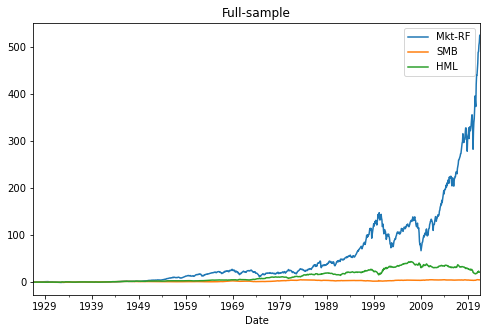

In [12]:
# 4
((factors + 1).cumprod() - 1).plot(figsize=(8,5),title = "Full-sample");

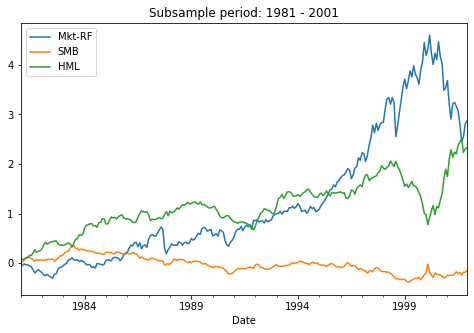

In [13]:
((factors["1981":"2001"] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 1981 - 2001");

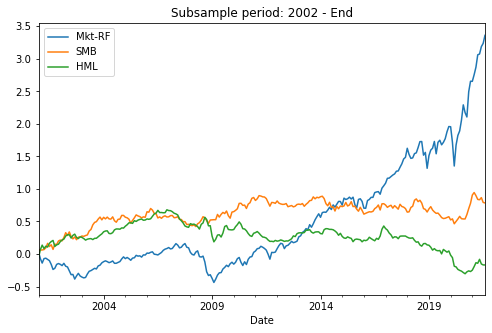

In [14]:
((factors["2001":] + 1).cumprod() - 1).plot(figsize=(8,5),title = "Subsample period: 2002 - End");

5. Does it appear that all three factors were valuable in 1981-2001? And post-2001? Would you advise DFA to continue emphasizing all three factors?

<span style="color:#00008B">**Solution:**</span> The size factor does not appear to be very valuable in 1981-2001 as it has a negative premium. The value factor falls to negative post-2001, so it does not look attractive. However, even if SMB or HML have negative means or bad Sharpe ratios, they may still be valuable to DFA and DFAs investors due to their very small correlation to MKT. Thus, we shouldn’t rule them out just based on their stand-alone properties. We would want to examine their info ratios etc to better understand if they can be of use to an investor mostly invested in MKT.

### 3 CAPM

In [15]:
portfolios = pd.read_excel('dfa_analysis_data.xlsx', sheet_name = 2)
portfolios = portfolios.set_index('Date')
portfolios_ex = portfolios.subtract(df['RF'],axis = 'rows')
portfolios_ex

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Date,,,,,,,,,,,,,,,,,,,,,
1926-07-31,0.0356,-0.0063,-0.0216,0.0013,0.0183,0.0099,0.0220,0.0027,-0.0282,-0.0055,...,0.0137,0.0131,0.0123,0.0005,0.0225,0.0323,0.0587,0.0174,0.0289,0.0034
1926-08-31,-0.0246,-0.0898,0.0219,0.0036,0.0815,0.0211,-0.0143,0.0376,0.0025,0.0592,...,0.0108,0.0362,0.0160,0.0192,0.0509,0.0076,0.0394,0.0180,0.0523,0.0751
1926-09-30,-0.0644,-0.0053,-0.0643,-0.0187,0.0063,-0.0288,-0.0149,0.0085,-0.0378,-0.0117,...,0.0086,-0.0076,-0.0172,0.0123,0.0064,-0.0152,0.0342,-0.0021,-0.0098,-0.0266
1926-10-31,-0.0894,-0.0407,-0.0599,0.0540,-0.0287,-0.0313,-0.0359,-0.0539,-0.0834,-0.0164,...,-0.0366,-0.0298,-0.0224,-0.0343,-0.0567,-0.0306,-0.0333,-0.0258,-0.0499,-0.0613
1926-11-30,0.0316,0.0634,0.0195,-0.0501,0.0023,0.0279,-0.0268,0.0270,0.0484,0.0242,...,0.0313,0.0208,0.0360,0.0462,0.0151,0.0398,0.0222,0.0120,0.0335,0.0225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-0.0319,-0.0251,0.0164,0.0101,-0.0097,0.0357,0.0165,0.0224,0.0080,0.0122,...,0.0438,0.0310,0.0593,0.0335,0.0605,0.0590,0.0582,0.0399,0.0478,0.0457
2021-05-31,0.0144,0.0053,0.0075,0.0235,0.1045,-0.0243,0.0016,0.0057,0.0261,0.0732,...,-0.0199,0.0004,0.0212,0.0370,0.0448,-0.0138,0.0076,0.0338,0.0366,0.0804
2021-06-30,0.0869,0.0518,0.0102,-0.0048,0.0372,0.0664,0.0352,0.0138,-0.0202,0.0112,...,0.0514,0.0024,-0.0106,-0.0386,-0.0464,0.0573,0.0148,-0.0228,-0.0235,-0.0372


In [16]:
subsample = portfolios_ex["1981":]

1. Summary Statistics. 

In [17]:
#1
summary_stats(subsample,12)

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM1,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM
Mean,0.0222,0.1069,0.0998,0.1248,0.1343,0.0702,0.1095,0.1099,0.1109,0.1198,...,0.1015,0.1001,0.0957,0.1047,0.1111,0.0944,0.0891,0.0857,0.0667,0.0994
Vol,0.2708,0.2368,0.1974,0.1923,0.2081,0.2438,0.2018,0.1821,0.1797,0.2120,...,0.2024,0.1753,0.1734,0.1730,0.1969,0.1604,0.1543,0.1523,0.1698,0.2056
Sharpe,0.0818,0.4513,0.5056,0.6490,0.6454,0.2879,0.5427,0.6037,0.6173,0.5650,...,0.5016,0.5710,0.5520,0.6049,0.5642,0.5882,0.5777,0.5624,0.3931,0.4837
VaR,-0.1147,-0.0940,-0.0841,-0.0773,-0.0878,-0.1036,-0.0813,-0.0768,-0.0777,-0.0928,...,-0.0828,-0.0708,-0.0757,-0.0682,-0.0837,-0.0745,-0.0654,-0.0692,-0.0752,-0.0961


In [18]:
port_summary = summary_stats(subsample,12).T
port_summary['portfolio_num'] = range(1,26)

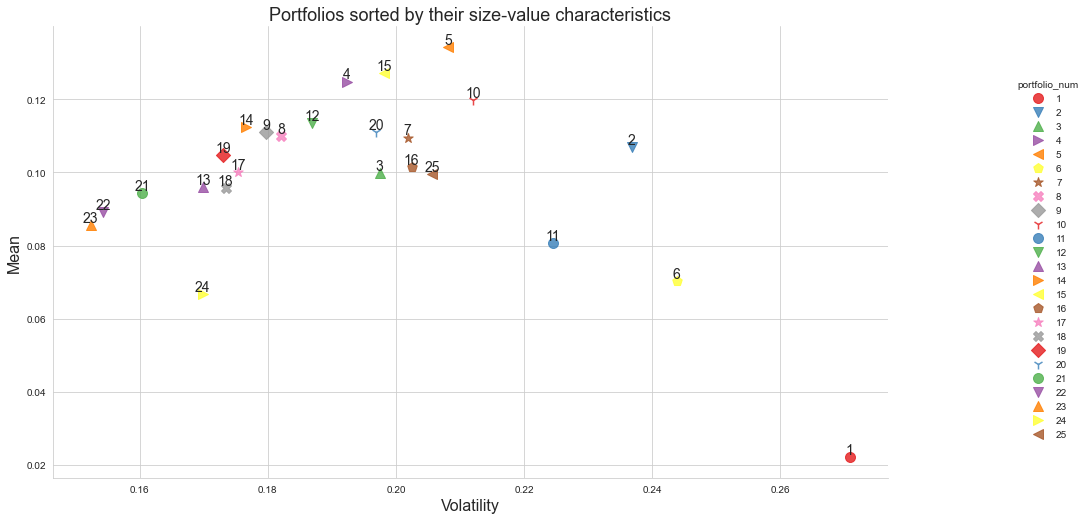

In [19]:
markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('Vol', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('Volatility', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.Vol, port_summary.Mean,port_summary.portfolio_num, plt.gca())

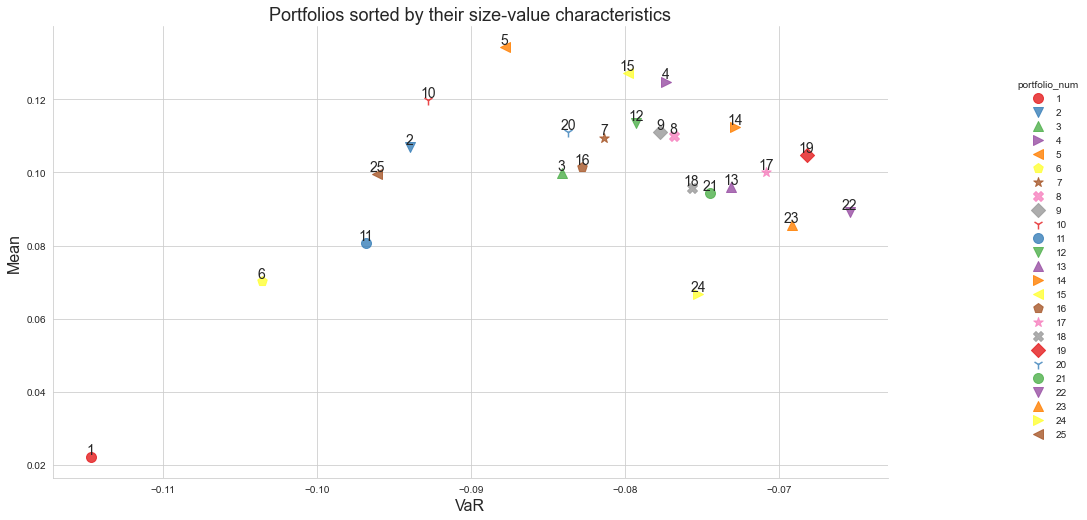

In [20]:
markers=['o', 'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o',\
         'v', '^', '>', '<', 'p', '*', 'X', 'D', '1','o', 'v', '^', '>', '<']
sns.set_style("whitegrid")
ax = sns.lmplot('VaR', # Horizontal axis
               'Mean', # Vertical axis
               hue='portfolio_num',palette="Set1",scatter_kws={"s": 100},
                data=port_summary, # Data source
               fit_reg=False, # Don't fix a regression line
               markers=markers,
               aspect =1) # size and dimension
ax.fig.set_figwidth(16)
ax.fig.set_figheight(7)
plt.title('Portfolios sorted by their size-value characteristics', fontsize=18)
plt.xlabel('VaR', fontsize=16)
plt.ylabel('Mean', fontsize=16)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(int(point['val'])), fontsize=14,\
                horizontalalignment='center', verticalalignment='bottom')

label_point(port_summary.VaR, port_summary.Mean,port_summary.portfolio_num, plt.gca())

<span style="color:#00008B">**Solution:**</span> The mean vs vol graph makes it very clear that vol is not the determinant of mean. The higher vol portfolios actually have lower means. The mean vs VaR plot is also a very week relationship.

2. CAPM

In [21]:
# 2(a)(b)
capm_data = portfolios_ex.join(df['Mkt-RF'])["1981":]

In [22]:
capm_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(capm_data['Mkt-RF'])
bm_residuals = pd.DataFrame(columns=portfolios_ex.columns)
t_p_values = pd.DataFrame()

for portf in portfolios_ex.columns:
    lhs = capm_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    capm_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    capm_report.loc[portf, 'beta_hat'] = res.params['Mkt-RF']
    capm_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    capm_report.loc[portf, 'treynor_ratio'] = 12 * capm_data[portf].mean() / res.params['Mkt-RF']
    bm_residuals[portf] = res.resid
    t_p_values.loc[portf, 't-value'] = res.params['const']
    t_p_values.loc[portf, 't-value'] = res.tvalues['const']
    t_p_values.loc[portf, 'p-value'] = round(res.pvalues['const'], 4)

In [23]:
capm_report

,alpha_hat,beta_hat,info_ratio,treynor_ratio
SMALL LoBM,-0.0949,1.3654,-0.5565,0.0162
ME1 BM2,0.0058,1.1789,0.0384,0.0906
ME1 BM3,0.0100,1.0485,0.0880,0.0952
ME1 BM4,0.0409,0.9789,0.3432,0.1275
SMALL HiBM,0.0481,1.0062,0.3464,0.1335
ME2 BM1,-0.0454,1.3494,-0.3571,0.0520
ME2 BM2,0.0127,1.1293,0.1247,0.0970
ME2 BM3,0.0224,1.0216,0.2448,0.1076
ME2 BM4,0.0273,0.9753,0.2777,0.1137
ME2 BM5,0.0234,1.1253,0.1916,0.1065


2(c) If (CAPM) were true, what would be true of the Treynor Ratios, alphas, and Information Ratios?

<span style="color:#00008B">**Solution:**</span> If CAPM were true, the alphas and the information ratios would all be zero. The Treynor Ratios would all equal to the mean excess market return.

3. Cross-sectional Estimation

In [24]:
#3

# The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(capm_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     5.186
Date:                Sat, 06 Nov 2021   Prob (F-statistic):             0.0324
Time:                        21:23:07   Log-Likelihood:                 124.13
No. Observations:                  25   AIC:                            -244.3
Df Residuals:                      23   BIC:                            -241.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.003      4.987      0.000       0.009       0.021
beta_hat      -0.0065      0.003     -2.277      0.032      -0.012      -0.001
==============================================================================
Omnibus:                        6.106   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                4.206
Skew:                          -0.945   Prob(JB):                        0.122
Kurtosis:                       3.680   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
#3(a) Report R-squared

res.rsquared

0.18398308768846838

In [26]:
#3(b) Report the intercept
res.params[0] * 12

0.182020141499321

In [27]:
#3(c) Report the regression coefficient
res.params[1] * 12

-0.07751393842321821

In [28]:
capm_data['Mkt-RF'].mean() * 12

0.08569918032786879

<span style="color:#00008B">**Solution:**</span> CAPM says the market beta is the only risk associated with higher average returns, so if it is true, the r-squared would be 100%, the intercept would be 0, and the regression coefficient $\lambda_m$ should be equal to the mean excess market return. 

4. Broadly speaking, do these results support DFA’s belief in size and value portfolios containing premia unrelated to the CAPM?

<span style="color:#00008B">**Solution:**</span> The answer can be yes and no. Our results support DFA's view that risks beyond market beta matter, but there's no enough evidence to show that size and value factors matter.  

### 4 Extensions

1. Re-do the analysis of 3.3 and 3.3, but instead of using the market return as the factor, use all three factors, (MKT, SMB, and HML). Note again that all three are already given as excess returns, so there is no need to use the risk-free rate data.
Thus, instead of testing (CAPM), you will be testing the Fama-French 3-Factor Model.

In [29]:
#4.1
ff_data = portfolios_ex.join(df)["1981":]
ff_data

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.0549,-0.0149,0.0099,0.0059,0.0211,-0.0600,-0.0107,-0.0126,0.0076,0.0206,...,0.0039,-0.0717,-0.0836,-0.0751,-0.0100,0.0095,-0.0504,0.0292,0.0672,0.0104
1981-02-28,-0.0447,-0.0105,0.0018,0.0092,0.0144,-0.0151,0.0051,0.0171,0.0244,0.0279,...,0.0272,0.0219,0.0094,-0.0167,0.0204,-0.0169,0.0057,-0.0034,0.0102,0.0107
1981-03-31,0.0607,0.0824,0.0738,0.0777,0.0610,0.0686,0.0715,0.0662,0.0663,0.0632,...,0.0649,0.0174,0.0199,-0.0093,0.0222,0.0696,0.0356,0.0354,0.0064,0.0121
1981-04-30,0.0181,0.0359,0.0248,0.0365,0.0441,0.0075,0.0247,0.0264,0.0268,0.0294,...,0.0063,-0.0383,-0.0535,-0.0390,0.0104,-0.0404,-0.0211,0.0440,0.0228,0.0108
1981-05-31,0.0382,0.0378,0.0325,0.0134,0.0168,0.0517,0.0103,0.0169,-0.0086,0.0136,...,0.0220,0.0043,-0.0328,-0.0313,0.0267,-0.0060,0.0011,0.0200,-0.0042,0.0115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-0.0319,-0.0251,0.0164,0.0101,-0.0097,0.0357,0.0165,0.0224,0.0080,0.0122,...,0.0605,0.0590,0.0582,0.0399,0.0478,0.0457,0.0493,-0.0311,-0.0093,0.0000
2021-05-31,0.0144,0.0053,0.0075,0.0235,0.1045,-0.0243,0.0016,0.0057,0.0261,0.0732,...,0.0448,-0.0138,0.0076,0.0338,0.0366,0.0804,0.0029,-0.0028,0.0704,0.0000
2021-06-30,0.0869,0.0518,0.0102,-0.0048,0.0372,0.0664,0.0352,0.0138,-0.0202,0.0112,...,-0.0464,0.0573,0.0148,-0.0228,-0.0235,-0.0372,0.0279,0.0180,-0.0776,0.0000


In [30]:
ff_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(ff_data[['Mkt-RF','SMB','HML']])

for portf in portfolios_ex.columns:
    lhs = ff_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    ff_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    ff_report.loc[portf, 'beta_mkt'] = res.params['Mkt-RF']
    ff_report.loc[portf, 'beta_s'] = res.params['SMB']       
    ff_report.loc[portf, 'beta_v'] = res.params['HML']                          
    ff_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
    ff_report.loc[portf, 'treynor_ratio'] = 12 * ff_data[portf].mean() / res.params['Mkt-RF']
ff_report

,alpha_hat,beta_mkt,beta_s,beta_v,info_ratio,treynor_ratio
SMALL LoBM,-0.0821,1.1228,1.3596,-0.2675,-0.9193,0.0197
ME1 BM2,0.0083,0.9776,1.3258,-0.0037,0.1164,0.1093
ME1 BM3,0.0002,0.9321,1.0384,0.2971,0.0048,0.1071
ME1 BM4,0.0240,0.8848,1.0584,0.4815,0.5049,0.1411
SMALL HiBM,0.0230,0.9409,1.0589,0.6913,0.3095,0.1427
ME2 BM1,-0.0308,1.1519,1.0043,-0.3307,-0.5269,0.0609
ME2 BM2,0.0090,1.0126,0.8942,0.1358,0.1793,0.1082
ME2 BM3,0.0070,0.9756,0.6914,0.4272,0.1345,0.1127
ME2 BM4,0.0060,0.9411,0.7549,0.5825,0.1353,0.1179
ME2 BM5,-0.0064,1.0973,0.9164,0.8057,-0.1357,0.1092


In [31]:
# The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(ff_report[['beta_mkt','beta_s','beta_v']])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     4.621
Date:                Sat, 06 Nov 2021   Prob (F-statistic):             0.0124
Time:                        21:23:07   Log-Likelihood:                 127.93
No. Observations:                  25   AIC:                            -247.9
Df Residuals:                      21   BIC:                            -243.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.004      3.430      0.003       0.006       0.024
beta_mkt      -0.0077      0.004     -1.821      0.083      -0.016       0.001
beta_s         0.0004      0.001      0.660      0.517      -0.001       0.002
beta_v         0.0025      0.001      3.049      0.006       0.001       0.004
==============================================================================
Omnibus:                       16.551   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.458
Skew:                          -1.553   Prob(JB):                     9.82e-05
Kurtosis:                       5.840   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
print(f"R-squared: {res.rsquared}")
print(f"Intercept: {res.params[0] * 12}")
print(f"Regression coefficient for market beta: {res.params[1]}")
print(f"Regression coefficient for size beta: {res.params[2]}")
print(f"Regression coefficient for value beta: {res.params[3]}")

R-squared: 0.39766339740733747
Intercept: 0.18254556200739985
Regression coefficient for market beta: -0.007675728227664381
Regression coefficient for size beta: 0.00043485434354369537
Regression coefficient for value beta: 0.0024513447398043517


In [33]:
print(f"Expected market excess return: {ff_data['Mkt-RF'].mean()*12}")
print(f"Expected premium to size factor: {ff_data['SMB'].mean()*12}")
print(f"Expected premium to value factor: {ff_data['HML'].mean()*12}")

Expected market excess return: 0.08569918032786879
Expected premium to size factor: 0.011245081967213117
Expected premium to value factor: 0.027152459016393425


2. Re-do the analysis of 3.3 and 3.3, but instead of using the market return as the factor, use a new factor: the in-sample tangency portfolio of the n = 25 portfolios.

In [34]:
# 4.2
def compute_tangency(df_tilde, diagonalize_Sigma=False):

    """Compute tangency portfolio given a set of excess returns.

    Also, for convenience, this returns the associated vector of average

    returns and the variance-covariance matrix.

    Parameters

    ----------

    diagonalize_Sigma: bool

        When `True`, set the off diagonal elements of the variance-covariance

        matrix to zero.

    """
    Sigma = df_tilde.cov()

    # N is the number of assets

    N = Sigma.shape[0]

    Sigma_adj = Sigma.copy()

    if diagonalize_Sigma:

        Sigma_adj.loc[:,:] = np.diag(np.diag(Sigma_adj))

    mu_tilde = df_tilde.mean()

    Sigma_inv = np.linalg.inv(Sigma_adj)

    weights = Sigma_inv @ mu_tilde / (np.ones(N) @ Sigma_inv @ mu_tilde)

    # For convenience, I'll wrap the solution back into a pandas.Series object.
    omega_tangency = pd.Series(weights, index=mu_tilde.index)
    
    return omega_tangency, mu_tilde, Sigma_adj

In [35]:
omega_tangency,mu_silde,Sigma_adj = compute_tangency(subsample)

In [36]:
omega_tangency

SMALL LoBM   -2.0472
ME1 BM2       0.8256
ME1 BM3      -0.0172
ME1 BM4       1.1503
SMALL HiBM    0.8912
ME2 BM1      -0.4942
ME2 BM2       1.0597
ME2 BM3       0.2449
ME2 BM4      -0.3748
ME2 BM5      -0.8393
ME3 BM1      -0.5070
ME3 BM2       0.0735
ME3 BM3      -0.5445
ME3 BM4       0.5008
ME3 BM5       0.2247
ME4 BM1       1.1325
ME4 BM2      -0.4537
ME4 BM3      -0.4676
ME4 BM4       0.1326
ME4 BM5       0.1333
BIG LoBM      1.0493
ME5 BM2      -0.0469
ME5 BM3       0.0784
ME5 BM4      -1.0051
BIG HiBM      0.3007
dtype: float64

In [37]:
ex_return_tan = subsample @ omega_tangency


In [38]:
tan_report = pd.DataFrame(index=portfolios_ex.columns)
rhs = sm.add_constant(ex_return_tan)

for portf in portfolios_ex.columns:
    lhs = ff_data[portf]
    res = sm.OLS(lhs, rhs, missing='drop').fit()
    tan_report.loc[portf, 'alpha_hat'] = res.params['const'] * 12
    tan_report.loc[portf, 'beta_hat'] = res.params[0]                         
    tan_report.loc[portf, 'info_ratio'] = np.sqrt(12) * res.params['const'] / res.resid.std()
tan_report

,alpha_hat,beta_hat,info_ratio
SMALL LoBM,-6.0368e-16,0.0570,-2.2311e-15
ME1 BM2,-4.1731e-16,0.2751,-1.8141e-15
ME1 BM3,-5.6758e-16,0.2570,-2.9822e-15
ME1 BM4,-3.9942e-16,0.3214,-2.2097e-15
SMALL HiBM,-1.3882e-15,0.3457,-7.0932e-15
ME2 BM1,-7.1297e-16,0.1807,-2.9585e-15
ME2 BM2,-8.2486e-16,0.2819,-4.2654e-15
ME2 BM3,-6.5312e-16,0.2830,-3.7827e-15
ME2 BM4,-8.7950e-16,0.2856,-5.1756e-15
ME2 BM5,-8.9512e-16,0.3084,-4.4215e-15


In [39]:
# The dependent variable, (y): mean excess returns from each of the n = 25 portfolios.
y = subsample.mean()

# The regressor, (x): the market beta from each of the n = 25 time-series regressions.
X = sm.add_constant(tan_report['beta_hat'])

res = sm.OLS(y,X,missing='drop').fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.427e+29
Date:                Sat, 06 Nov 2021   Prob (F-statistic):          3.98e-321
Time:                        21:23:07   Log-Likelihood:                 921.53
No. Observations:                  25   AIC:                            -1839.
Df Residuals:                      23   BIC:                            -1837.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.64e-17   2.25e-17     -2.063      0.051   -9.29e-17     1.2e-19
beta_hat       0.0324   8.57e-17   3.78e+14      0.000       0.032       0.032
==============================================================================
Omnibus:                        2.861   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.144
Skew:                          -0.714   Prob(JB):                        0.342
Kurtosis:                       2.860   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(f"R-squared: {res.rsquared}")
print(f"Intercept: {res.params[0] * 12}")
print(f"Regression coefficient for tangency beta: {res.params[1]}")

R-squared: 1.0
Intercept: -5.568462357885551e-16
Regression coefficient for tangency beta: 0.032370773466460674


In [41]:
print(f"Expected premium to tangency portfolio: {ex_return_tan.mean()}")

Expected premium to tangency portfolio: 0.03237077346646077


<span style="color:#00008B">**Solution:**</span>
The cross-sectional regression coefficient for tangency beta is exactly the same as the expected premium to tangency portfolio. 

Professor discussed this in class on Oct. 25th, or you can refer to the lecture 5 notes on the Fundamental Theorem of Asset Pricing. It turns out that the Tangency Portfolio works perfectly as a factor in a factor model. This is NOT because of any assumption about normality or Mean-Variance investors. It is just an amazing mathematical fact. As the derivation shows, it flows from the idea that the covariance of the tangency portfolio with any asset is a linear function of the asset’s mean. We saw that in Lecture 1 as a minor point, but if we rewrite it, we find it makes a perfect beta model. But it is NOT practical to use. As we saw in Week 1, we can never trust that the sample tangency portfolio will hold up out of sample.


If you are interested in why these two equal to each other, you can check out the derivation below:  

$R$: the matrix of portfolio excess returns  
$\mu$: the vector of mean portfolio excess returns  
$\mu_i$: the mean excess return of portfolio i  
$w^t$: the weights of tangency porfolio  
$\tilde{\beta}$: the vector of time-series regression coefficients  
$\gamma^t$: the cross-sectional regression coefficient  
$$
    r^t = Rw^t
$$
$$
    E(r^t) = \mu'w^t
$$
$$
    E(r^i) = \beta^i E(r^t) = \beta^i \mu'w^t = \mu_i
$$
$$
    \beta^i = \frac{1}{\mu'w^t}\mu_i
$$
$$
    \tilde{\beta} = \mu / (\mu'w^t)
$$
$$
    \gamma^t = \frac{Cov(\mu,\tilde{\beta})} {Var(\tilde{\beta})}
             = \frac{Cov(\mu,\frac{1}{\mu'w^t}\mu)}{ Var(\frac{1}{\mu'w^t}\mu_i)}
             = \frac{\frac{1}{\mu'w^t}Cov(\mu,\mu)}{({\frac{1}{\mu'w^t}}^2) Var(\mu_i)}
             = \mu'w^t
$$

3. In problem 2.3, we measured how well the CAPM performs by running the analogous regression. In fact, we could have assessed it directly from the time-series regressions.

In [42]:
# 3(a)

# Note: alpha_hat has already been annualized in the previous question
MAE_alpha = (100 * capm_report['alpha_hat']).abs().mean()
print('MAE = {:.2f} %'.format(MAE_alpha))

MAE = 2.27 %


In [43]:
capm_data

,SMALL LoBM,ME1 BM2,ME1 BM3,ME1 BM4,SMALL HiBM,ME2 BM1,ME2 BM2,ME2 BM3,ME2 BM4,ME2 BM5,...,ME4 BM2,ME4 BM3,ME4 BM4,ME4 BM5,BIG LoBM,ME5 BM2,ME5 BM3,ME5 BM4,BIG HiBM,Mkt-RF
Date,,,,,,,,,,,,,,,,,,,,,
1981-01-31,-0.0549,-0.0149,0.0099,0.0059,0.0211,-0.0600,-0.0107,-0.0126,0.0076,0.0206,...,-0.0449,-0.0120,-0.0055,0.0039,-0.0717,-0.0836,-0.0751,-0.0100,0.0095,-0.0504
1981-02-28,-0.0447,-0.0105,0.0018,0.0092,0.0144,-0.0151,0.0051,0.0171,0.0244,0.0279,...,0.0147,0.0332,0.0027,0.0272,0.0219,0.0094,-0.0167,0.0204,-0.0169,0.0057
1981-03-31,0.0607,0.0824,0.0738,0.0777,0.0610,0.0686,0.0715,0.0662,0.0663,0.0632,...,0.0557,0.0710,0.0619,0.0649,0.0174,0.0199,-0.0093,0.0222,0.0696,0.0356
1981-04-30,0.0181,0.0359,0.0248,0.0365,0.0441,0.0075,0.0247,0.0264,0.0268,0.0294,...,-0.0191,-0.0031,-0.0078,0.0063,-0.0383,-0.0535,-0.0390,0.0104,-0.0404,-0.0211
1981-05-31,0.0382,0.0378,0.0325,0.0134,0.0168,0.0517,0.0103,0.0169,-0.0086,0.0136,...,0.0102,0.0052,-0.0008,0.0220,0.0043,-0.0328,-0.0313,0.0267,-0.0060,0.0011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-30,-0.0319,-0.0251,0.0164,0.0101,-0.0097,0.0357,0.0165,0.0224,0.0080,0.0122,...,0.0310,0.0593,0.0335,0.0605,0.0590,0.0582,0.0399,0.0478,0.0457,0.0493
2021-05-31,0.0144,0.0053,0.0075,0.0235,0.1045,-0.0243,0.0016,0.0057,0.0261,0.0732,...,0.0004,0.0212,0.0370,0.0448,-0.0138,0.0076,0.0338,0.0366,0.0804,0.0029
2021-06-30,0.0869,0.0518,0.0102,-0.0048,0.0372,0.0664,0.0352,0.0138,-0.0202,0.0112,...,0.0024,-0.0106,-0.0386,-0.0464,0.0573,0.0148,-0.0228,-0.0235,-0.0372,0.0279


In [44]:
# (b)
T = subsample.dropna().shape[0]
SR = capm_data['Mkt-RF'].mean() / capm_data['Mkt-RF'].std()
Sigma = bm_residuals.cov()
Sigma_inv = pd.DataFrame(np.linalg.inv(Sigma), index=Sigma.index, columns=Sigma.columns)
alpha = capm_report['alpha_hat']
H = T * (1 + SR**2)**(-1) * alpha @ Sigma_inv @ alpha
print('H = {:.2f}'.format(H))
pvalue = 1 - stats.chi2.cdf(H, df=25)
print('p-value = {:.4f}'.format(pvalue))

H = 19316.54
p-value = 0.0000


In [45]:
# (c)
display(t_p_values.sort_values(by='p-value', ascending=False))

,t-value,p-value
ME4 BM1,-0.0710,0.9435
ME1 BM2,0.2417,0.8091
BIG HiBM,0.5252,0.5997
ME1 BM3,0.5536,0.5801
ME5 BM4,-0.7293,0.4662
ME4 BM3,0.7547,0.4508
ME2 BM2,0.7844,0.4332
ME4 BM2,0.9187,0.3587
ME5 BM3,0.9238,0.3561
ME3 BM3,0.9716,0.3317


<span style="color:#00008B">**Solution:**</span>

<span style="color:#00008B"> (a) The MAE is $2.18\%$ (annualized by multiplying by $12$)</span>

<span style="color:#00008B"> This is a huge error given that we are trying to explain sample risk premia ranging between
$10-20\%$ annually.</span>

<span style="color:#00008B"> (b) Based on the test formula, </span>

<span style="color:#00008B"> $$ H = 19316.54 \text{ , p-value} = 0.0000 $$ </span>

<span style="color:#00008B">The joint test rejects that the CAPM holds, even at a critical value of $0.01\%$.</span>

<span style="color:#00008B"> (c) By definition, a joint test is stricter than testing the conditions individually. </span>

<span style="color:#00008B">In our case, we can see that most of the alphas (20 alphas) are not significant (as $p$-value $\geq$ 0.05) while 5 alphas are signficant (as $p$-value $\leq$ 0.05) as judged by their individual $t$-stats, yet all of them are jointly significant as judged by this joint test.</span>

<span style="color:#00008B"> (d) We have demonstrated that an LFM is exactly the same as asserting that a set of factors spans the MV frontier, (and thus spans the tangency portfolio.) Thus, this test can be
interpreted as checking whether investing in the alphas gets beyond the tangency portfolio.
The test stat is basically comparing the square SR of the alphas to the square SR of the factors.</span>